In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

In [25]:
train_data = pd.read_csv('C:/Users/user/Desktop/BTC-USD.csv')

In [26]:
train_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3454,2024-03-02,62431.652344,62458.699219,61657.289063,62029.847656,62029.847656,23888473685
3455,2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,63167.371094,26253811450
3456,2024-03-04,63137.003906,68537.031250,62386.519531,68330.414063,68330.414063,70670471105
3457,2024-03-05,68341.054688,69170.625000,59323.910156,63801.199219,63801.199219,102802940877
3458,2024-03-06,63814.085938,67573.460938,62863.472656,66298.554688,66298.554688,105739542528


In [27]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [28]:
train_data['Year'] = train_data.index.year
train_data['Month'] = train_data.index.month
train_data['Weekday Name'] = train_data.index.day_name()

In [29]:
train_data.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday Name
Date,,,,,,,,,
2024-03-02,62431.652344,62458.699219,61657.289063,62029.847656,62029.847656,23888473685,2024,3,Saturday
2024-03-03,62031.578125,63230.210938,61435.023438,63167.371094,63167.371094,26253811450,2024,3,Sunday
2024-03-04,63137.003906,68537.031250,62386.519531,68330.414063,68330.414063,70670471105,2024,3,Monday
2024-03-05,68341.054688,69170.625000,59323.910156,63801.199219,63801.199219,102802940877,2024,3,Tuesday
2024-03-06,63814.085938,67573.460938,62863.472656,66298.554688,66298.554688,105739542528,2024,3,Wednesday


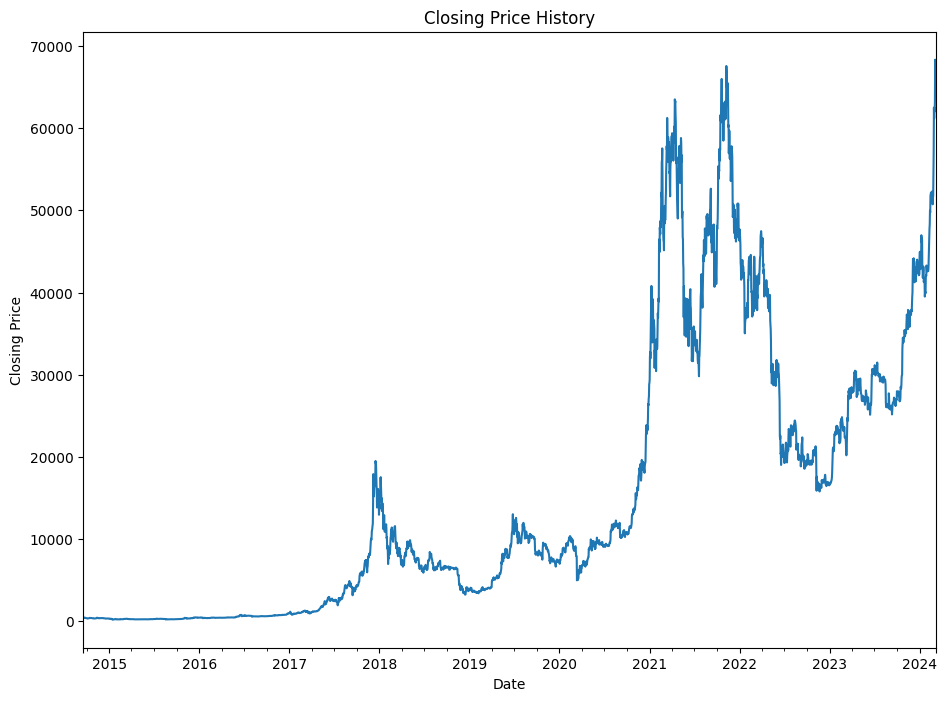

In [30]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Adj Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

<Figure size 1600x800 with 0 Axes>

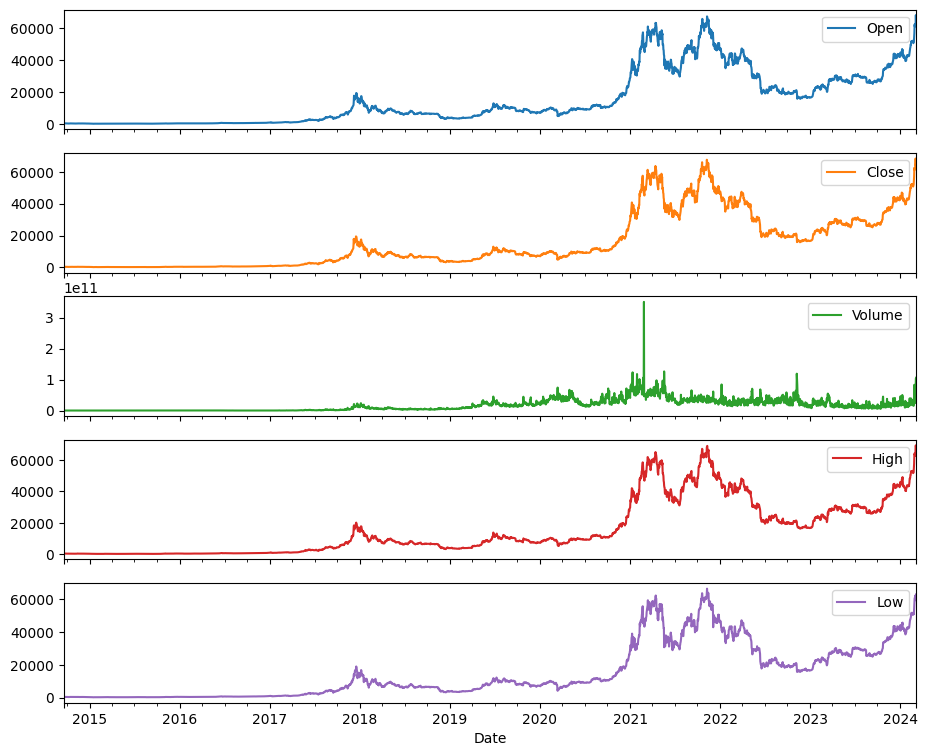

In [31]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

In [34]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0 # high-low percentage
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0 # open-close percentage

In [35]:
train_data.shape

(3459, 11)

In [37]:
train_data.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday Name,HL_PCT,PCT_change
Date,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,2014,9,Wednesday,3.481708,-1.831006
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,2014,9,Thursday,10.592001,-7.096262
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,2014,9,Friday,11.261215,-6.910351
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,2014,9,Saturday,8.570005,3.605767
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,2014,9,Sunday,4.894691,-2.270110


In [36]:
train_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Year            0
Month           0
Weekday Name    0
HL_PCT          0
PCT_change      0
dtype: int64

In [38]:
df = train_data[['HL_PCT', 'PCT_change', 'Adj Close','Volume']]

In [39]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Adj Close'].shift(-forecast_out)

173


C:\Users\user\AppData\Local\Temp\ipykernel_11452\865381396.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Adj Close'].shift(-forecast_out)


In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [42]:
scaler = StandardScaler()

In [44]:
X = np.array(df.drop(['label'], axis=1))
scaler.fit(X)
X = scaler.transform(X)

In [45]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [46]:
X.shape

(3286, 4)

In [49]:
df.dropna(inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_11452\1379821321.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [50]:
y = np.array(df['label'])
y.shape

(3286,)

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
lr_confidence = lr.score(X_test, y_test)

In [54]:
lr_confidence

0.66619106559561

In [55]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [56]:
rf_confidence = rf.score(X_test, y_test)

In [57]:
rf_confidence

0.8953494067773253

In [58]:
rg = Ridge()
rg.fit(X_train, y_train)

Ridge()

In [59]:
rg_confidence = rg.score(X_test, y_test)


In [60]:
rg_confidence

0.6661921852900342

In [61]:
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [62]:
svr_confidence = svr.score(X_test, y_test)

In [63]:
svr_confidence

-0.11362834883505024

In [64]:
names = ['Linear Regression', 'Random Forest', 'Ridge', 'SVR']
columns = ['model', 'accuracy']
scores = [lr_confidence, rf_confidence, rg_confidence, svr_confidence]
alg_vs_score = pd.DataFrame([[x, y] for x, y in zip(names, scores)], columns = columns)
alg_vs_score

,model,accuracy
0,Linear Regression,0.666191
1,Random Forest,0.895349
2,Ridge,0.666192
3,SVR,-0.113628


In [65]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day

In [66]:
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan

C:\Users\user\AppData\Local\Temp\ipykernel_11452\312354264.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan


In [67]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

C:\Users\user\AppData\Local\Temp\ipykernel_11452\869091167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
C:\Users\user\AppData\Local\Temp\ipykernel_11452\869091167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
C:\Users\user\AppData\Local\Temp\ipykernel_11452\869091167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retur

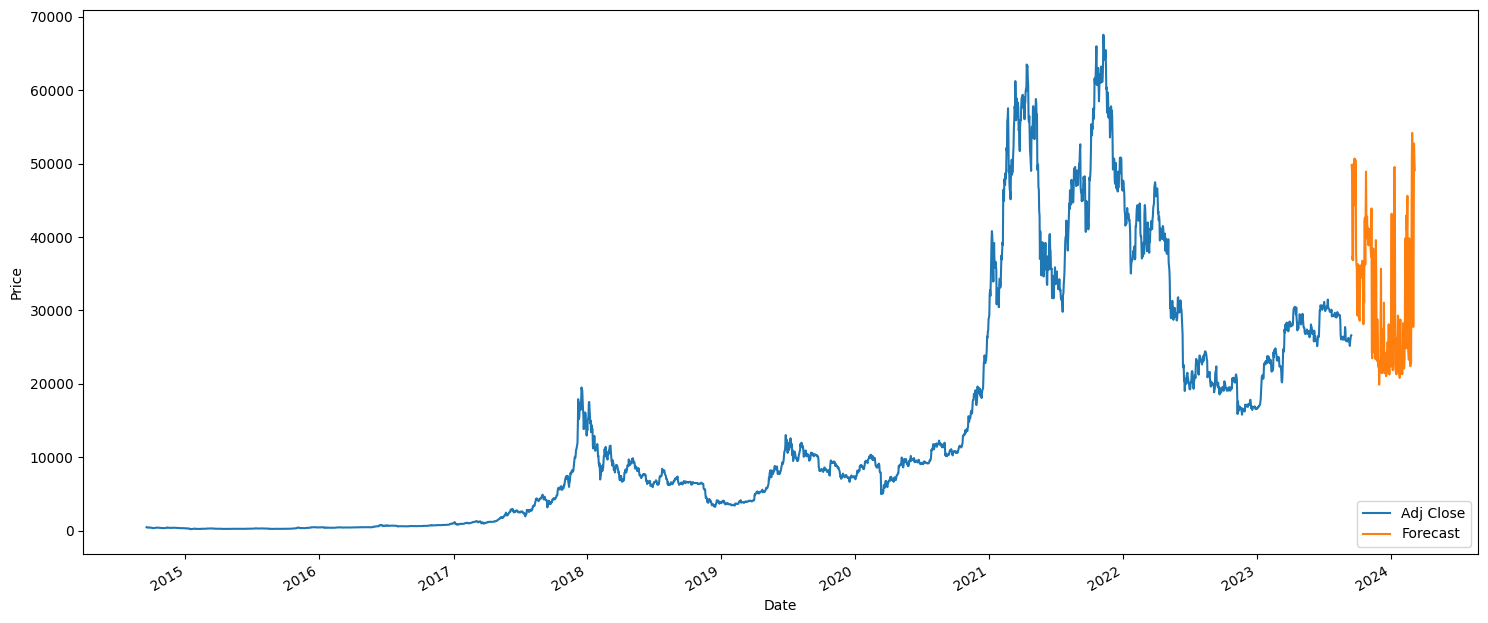

In [68]:
plt.figure(figsize=(18, 8))
df['Adj Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

<Axes: xlabel='Date'>

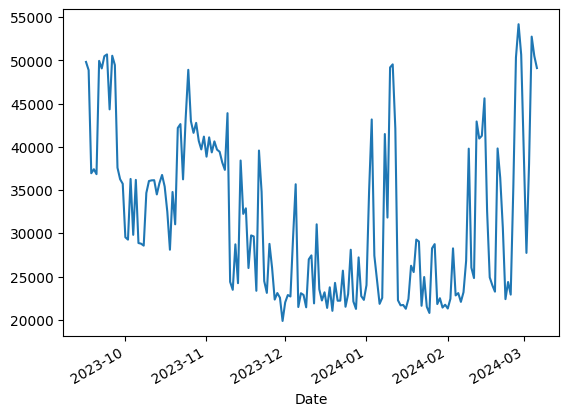

In [69]:
df['Forecast'].plot()